comparison to http://minimaxir.com/2017/01/amazon-spark/, credits: Max Woolf

In [94]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetimeaime
from ggplot import *
plt.style.use('seaborn-whitegrid')
#['grayscale', 'fivethirtyeight', 'seaborn-deep', 'bmh', 'seaborn-poster', 'seaborn-ticks', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-whitegrid', 'seaborn-white', 'seaborn-bright', 'seaborn-paper', 'seaborn-pastel', 'seaborn-colorblind', 'seaborn-notebook', 'seaborn-dark-palette', 'dark_background', 'ggplot', 'seaborn-muted', 'seaborn-talk', 'classic']

## Exploratory analysis

In [2]:
df = pd.read_csv("amazon_ratings.csv")
df.head(10)

,user_id,item_id,rating,timestamp,category
0,A00027081JC8NE8X6TD5,B003U8ENTI,5.0,1367625600,"[[u'electronics', u'computers & accessories', ..."
1,A00090122PEQW7864EC8L,B004JW1B8A,1.0,1354492800,"[[u'toys & games', u'party supplies', u'party ..."
2,A0009686KROLKEH2EHF4,B000I7GST2,5.0,1372723200,"[[u'home & kitchen', u'kitchen & dining', u'ki..."
3,A0023922YYT81KP1CWU4,B000R9AAJA,5.0,1353542400,"[[u'electronics', u'computers & accessories', ..."
4,A00277003AGRC9WJJ555O,B002FU5QM0,5.0,1353196800,"[[u'electronics', u'computers & accessories', ..."
5,A00311601FOXCO2AIRNIF,B003LCV4RM,5.0,1382054400,"[[u'patio, lawn & garden', u'pest control', u'..."
6,A00317262XRVTNR5YJQYQ,B001MQ8BDE,5.0,1362096000,"[[u'electronics', u'computers & accessories', ..."
7,A0031944XK4KVC58YJ6I,B003U8GCJC,5.0,1355702400,"[[u'electronics', u'computers & accessories', ..."
8,A00343841Z6YRUBZ6K0W3,B0015C30J0,5.0,1386374400,"[[u'electronics', u'computers & accessories', ..."
9,A0047322388NOTO4N8SKD,B002FU5QLQ,4.0,1398038400,"[[u'electronics', u'computers & accessories', ..."


Transform categories into list

In [3]:
def get_category(x): 
    while 'u\'' in x:
        x = x.replace('u\'','\'')
    for y in eval(x):
        for first in y:
            return first
df['category'] = df['category'].apply(get_category)
df.head(10)

,user_id,item_id,rating,timestamp,category
0,A00027081JC8NE8X6TD5,B003U8ENTI,5.0,1367625600,electronics
1,A00090122PEQW7864EC8L,B004JW1B8A,1.0,1354492800,toys & games
2,A0009686KROLKEH2EHF4,B000I7GST2,5.0,1372723200,home & kitchen
3,A0023922YYT81KP1CWU4,B000R9AAJA,5.0,1353542400,electronics
4,A00277003AGRC9WJJ555O,B002FU5QM0,5.0,1353196800,electronics
5,A00311601FOXCO2AIRNIF,B003LCV4RM,5.0,1382054400,"patio, lawn & garden"
6,A00317262XRVTNR5YJQYQ,B001MQ8BDE,5.0,1362096000,electronics
7,A0031944XK4KVC58YJ6I,B003U8GCJC,5.0,1355702400,electronics
8,A00343841Z6YRUBZ6K0W3,B0015C30J0,5.0,1386374400,electronics
9,A0047322388NOTO4N8SKD,B002FU5QLQ,4.0,1398038400,electronics


Transform date into readable date

In [4]:
def get_time(x): 
    return datetime.datetime.fromtimestamp(
        int(x)
    ).strftime('%Y-%m-%d %H:%M:%S')

df['time'] = df['timestamp'].apply(get_time)
df.head(10)

,user_id,item_id,rating,timestamp,category,time
0,A00027081JC8NE8X6TD5,B003U8ENTI,5.0,1367625600,electronics,2013-05-04 02:00:00
1,A00090122PEQW7864EC8L,B004JW1B8A,1.0,1354492800,toys & games,2012-12-03 01:00:00
2,A0009686KROLKEH2EHF4,B000I7GST2,5.0,1372723200,home & kitchen,2013-07-02 02:00:00
3,A0023922YYT81KP1CWU4,B000R9AAJA,5.0,1353542400,electronics,2012-11-22 01:00:00
4,A00277003AGRC9WJJ555O,B002FU5QM0,5.0,1353196800,electronics,2012-11-18 01:00:00
5,A00311601FOXCO2AIRNIF,B003LCV4RM,5.0,1382054400,"patio, lawn & garden",2013-10-18 02:00:00
6,A00317262XRVTNR5YJQYQ,B001MQ8BDE,5.0,1362096000,electronics,2013-03-01 01:00:00
7,A0031944XK4KVC58YJ6I,B003U8GCJC,5.0,1355702400,electronics,2012-12-17 01:00:00
8,A00343841Z6YRUBZ6K0W3,B0015C30J0,5.0,1386374400,electronics,2013-12-07 01:00:00
9,A0047322388NOTO4N8SKD,B002FU5QLQ,4.0,1398038400,electronics,2014-04-21 02:00:00


Unique authors

In [5]:
df_user_review_counts = df.groupby(df.user_id)
counts = df_user_review_counts.count().ix[:,0].value_counts().sort_index()
counts

1     196810
2      20626
3       9887
4       2974
5       1551
6       1461
7        392
8        176
9         84
10       134
11        41
12        20
13        19
14        12
15         8
16         9
17         6
18         3
19         5
20         5
21         3
22         2
23         2
24         6
25         1
26         1
28         1
29         1
33         1
41         1
43         2
65         1
Name: user_id, dtype: int64

In [6]:
num_reviews = []
prop = []

s = 0
for i in range(0,counts.shape[0]):
    num_reviews.append(counts.index[i])
    s += counts.iloc[i]/sum(counts)
    prop.append(s)

df_counts = pd.DataFrame(
    {'num_reviews': num_reviews,
     'prop': prop
    })
df_counts.head()

,num_reviews,prop
0,1,0.840189
1,2,0.928242
2,3,0.970450
3,4,0.983146
4,5,0.989767


(0, 50)

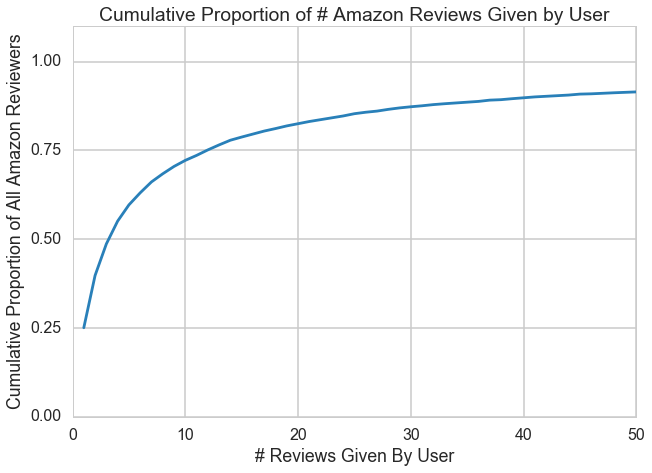

In [111]:
ax = df_counts.plot(x='num_reviews', y='prop', figsize=(9,7),
                    color="#2980b9", legend=None, title="Cumulative Proportion of # Amazon Reviews Given by User")
ax.set_xlabel("# Reviews Given By User")
ax.set_ylabel("Cumulative Proportion of All Amazon Reviewers")
ax.set_ylim((0,1.1))
ax.yaxis.set_ticks(np.arange(0, 1.1, 0.25))
ax.set_xlim((0,50))

In [8]:
df_user_review_counts = df.groupby(df.item_id)
counts = df_user_review_counts.count().ix[:,0].value_counts().sort_index()
counts

1       2503
2       1472
3        889
4        642
5        457
6        340
7        307
8        229
9        207
10       171
11       140
12       155
13       141
14       132
15        89
16        85
17        84
18        70
19        75
20        62
21        62
22        52
23        55
24        49
25        64
26        41
27        32
28        49
29        41
30        32
        ... 
1228       1
1256       1
1270       1
1307       1
1319       1
1416       1
1495       1
1525       1
1535       1
1542       1
1543       1
1546       1
1549       1
1572       1
1575       1
1578       1
1643       1
1691       1
1770       1
1791       1
1877       1
1910       1
2015       1
2180       1
2344       1
2425       1
2582       2
2729       1
3394       1
4185       1
Name: user_id, dtype: int64

In [9]:
num_reviews = []
prop = []

s = 0
for i in range(0,counts.shape[0]):
    num_reviews.append(counts.index[i])
    s += counts.iloc[i]/sum(counts)
    prop.append(s)

df_counts = pd.DataFrame(
    {'num_reviews': num_reviews,
     'prop': prop
    })
df_counts.head()

,num_reviews,prop
0,1,0.250250
1,2,0.397421
2,3,0.486303
3,4,0.550490
4,5,0.596181


(0, 50)

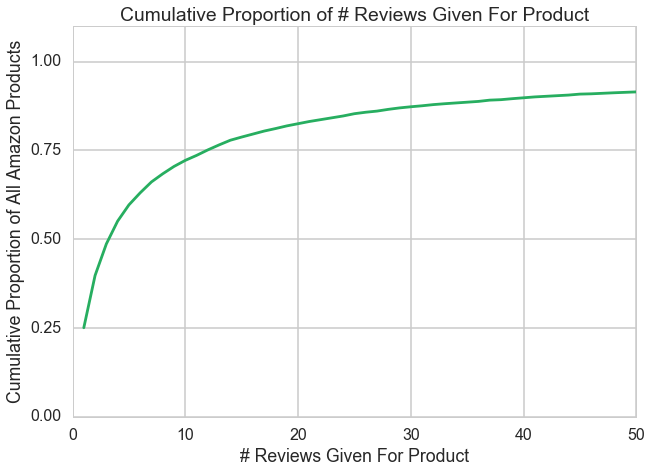

In [112]:
ax = df_counts.plot(x='num_reviews', y='prop', figsize=(9,7),
                    color="#27ae60", legend=None, title="Cumulative Proportion of # Reviews Given For Product")
ax.set_xlabel("# Reviews Given For Product")
ax.set_ylabel("Cumulative Proportion of All Amazon Products")
ax.set_ylim((0,1.1))
ax.yaxis.set_ticks(np.arange(0, 1.1, 0.25))
ax.set_xlim((0,50))

In [18]:
df_user_review_counts = df.groupby(df.category)
counts = df_user_review_counts.count().ix[:,0]

categories = pd.DataFrame({'avg_rating': df_user_review_counts.agg({'rating': 'mean'})['rating'], 
                            'count': counts})
categories

,avg_rating,count
category,,
all beauty,4.600000,10
all electronics,4.185185,270
amazon fashion,4.376923,130
appliances,4.600000,5
"arts, crafts & sewing",4.321429,476
automotive,4.020660,4453
baby,4.305796,2312
baby products,4.623529,510
beauty,4.281728,5878


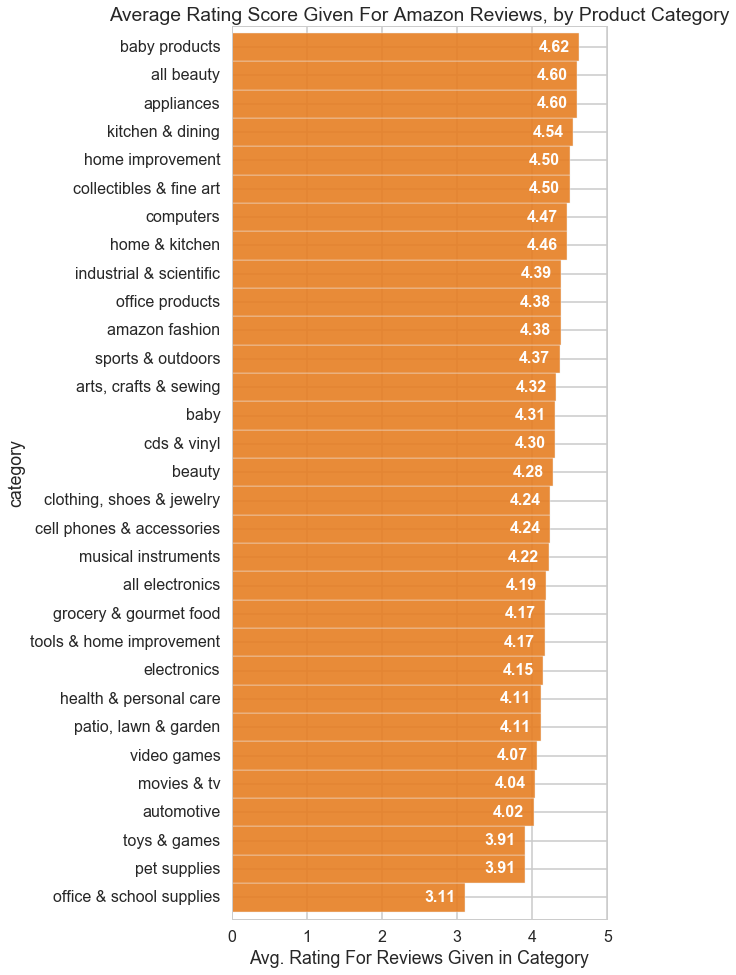

In [176]:
cats = categories['avg_rating'].sort_values(ascending=True)
ax = cats.plot.barh(width=1.0, color = "#e67e22", alpha=0.9, figsize=(6, 16))
ax.set_title("Average Rating Score Given For Amazon Reviews, by Product Category")
ax.set_xlabel("Avg. Rating For Reviews Given in Category")
for i in range(0,cats.shape[0]):
    height = cats[i]
    ax.text(height-1/3, i-1/4,
            '%.2f' % height,
            ha='center', va='bottom', color = 'white', fontweight='bold', size=16)
    

## Distribution of ratings

In [227]:
counts = df.groupby(df.user_id).count().ix[:,0]
avg_rating = df.groupby(df.user_id).agg({'rating': 'mean'})['rating']

users = pd.DataFrame({'avg_rating': avg_rating, 
                            'count_reviews': counts})
users = users[users.count_reviews > 4]
users['avg_rating'] = round(users['avg_rating'],1)
users.head()

,avg_rating,count_reviews
user_id,,
A02444252I8NHTG9BGNBX,3.0,6
A1000I81ZDTJVE,5.0,6
A10097311BAFYJXQ2ZA7F,5.0,8
A100UD67AHFODS,4.3,7
A1029LADQF0L2O,5.0,6


In [178]:
counts = users['avg_rating'].value_counts()
counts = pd.DataFrame(counts).sort_index()
counts2 = counts.reset_index()
counts2.head()

,index,avg_rating
0,1.0,110
1,1.2,2
2,1.3,2
3,1.4,3
4,1.7,2


In [215]:
av = sum(counts2['index']*counts2['avg_rating'])/ sum(counts2['avg_rating'])
av

Int64Index([36], dtype='int64')

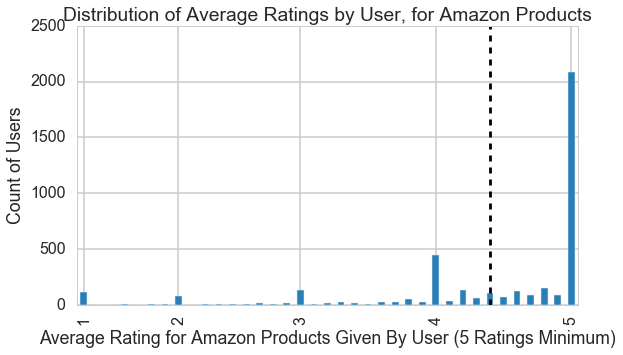

In [224]:
ax = counts.plot.bar(figsize=(8,5), color ='#2980b9', legend=None)
ax.axvline(counts2[counts2['index']==round(av,1)].index, color='k', linestyle='--')
ax.set_title("Distribution of Average Ratings by User, for Amazon Products")
ax.set_xlabel("Average Rating for Amazon Products Given By User (5 Ratings Minimum)")
ax.set_ylabel("Count of Users")
ax.set_xticks([0,7,16,26,36])
ax.set_xticklabels(['1','2','3','4','5'])

In [228]:
counts = df.groupby(df.item_id).count().ix[:,0]
avg_rating = df.groupby(df.item_id).agg({'rating': 'mean'})['rating']

users = pd.DataFrame({'avg_rating': avg_rating, 
                            'count_reviews': counts})
users = users[users.count_reviews > 4]
users['avg_rating'] = round(users['avg_rating'],1)
users.head()

,avg_rating,count_reviews
item_id,,
0767821556,4.6,190
0800121260,4.4,49
0978571630,4.2,5
B000002HK4,4.6,98
B00000JXTC,4.7,7


In [229]:
counts = users['avg_rating'].value_counts()
counts = pd.DataFrame(counts).sort_index()
counts2 = counts.reset_index()
counts2.head()

,index,avg_rating
0,1.1,1
1,1.2,1
2,1.3,3
3,1.4,2
4,1.5,5


In [238]:
av = sum(counts2['index']*counts2['avg_rating'])/ sum(counts2['avg_rating'])
av
counts2[counts2['index']==4]

,index,avg_rating
29,4.0,277


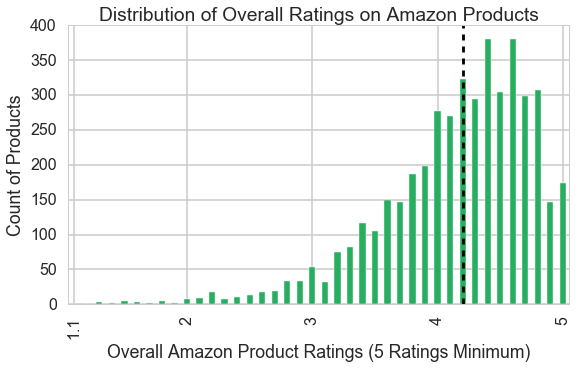

In [243]:
ax = counts.plot.bar(figsize=(8,5), color ='#27ae60', legend=None)
ax.axvline(counts2[counts2['index']==round(av,1)].index, color='k', linestyle='--')
ax.set_title("Distribution of Overall Ratings on Amazon Products")
ax.set_xlabel("Overall Amazon Product Ratings (5 Ratings Minimum)")
ax.set_ylabel("Count of Products")
ax.set_xticks([0,9,19,29,39])
ax.set_xticklabels(['1.1','2','3','4','5'])